# Retail Data Analytics

Dataset from **Kaggle**: [Retail Data Analytics](https://www.kaggle.com/datasets/manjeetsingh/retaildataset) </br>
The challenge is to predict which departments will be affected and to what extent. </br> 
Consider that data has **markdowns with limited history availability.** </br> 
Data consists of 45 **stores** located in different **regions**, each store with different **deparments**. </br> 
Look for another perspective within this [alternative solution](https://www.kaggle.com/code/aremoto/retail-sales-forecast/notebook#Merge-the-data-in-a-unique-DataFrame).

## Stage 1 | Define the objective


    1- Predict the department-wide sales for each store for the following year
    2- Model the effects of markdowns on holiday weeks
    3- Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact


## Stage 2 | Data Gathering & Overview

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [168]:
# Sorted for temporal analysis
froot="archive"
featDF=pd.read_csv(f"{froot}/Features data set.csv")
salesDF=pd.read_csv(f"{froot}/sales data-set.csv")
storesDF=pd.read_csv(f"{froot}/stores data-set.csv")

In [173]:
print(featDF.columns)
print(salesDF.columns)
print(storesDF.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')


## Stage 3 | Data Cleaning

Some parameters to consider:
- Missing data (Nans)
- Zero valued data (Depending on the knowledge domain, this could be noise)
- Data types
- Find Dupplicates (Depending on the knowledge domain, this could be errors)

### featDF

In [140]:
featDF.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [141]:
#Check Datatypes
pd.DataFrame(featDF.dtypes).T

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool


In [142]:
featDF["Date"]=pd.to_datetime(featDF.Date) # Converted to datetime
featDF=featDF.sort_values(["Store", "Date"]) #Sorted by Store and Date
featDF=featDF.reset_index()
del featDF["index"]

In [143]:
# Portion of null data
pd.DataFrame(featDF.isnull().sum()/featDF.shape[0]).T

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0.0,0.0,0.0,0.0,0.507692,0.643346,0.558852,0.577045,0.505495,0.071429,0.071429,0.0


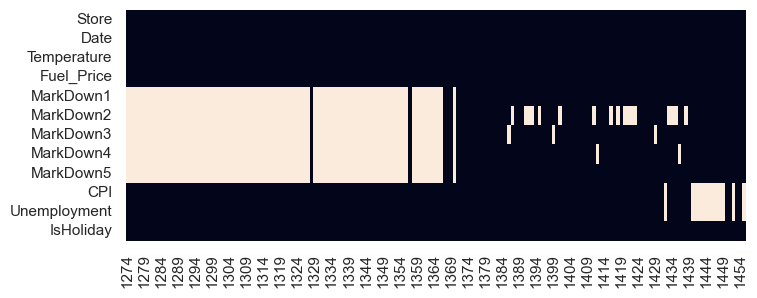

In [144]:
#Get a clampse of the missing data per
sns.heatmap(featDF.loc[featDF["Store"]==8].isnull().T, cbar=False)
sns.set(rc={'figure.figsize':(8,3)})
plt.show()

In [145]:
# Data with zero value
pd.DataFrame((featDF==0).sum()/featDF.shape[0]).T

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,0.0,0.0,0.0,0.0,0.0,0.000366,0.000122,0.0,0.0,0.0,0.0,0.928571


In [146]:
#For a better perspective on temporal data: 
featDF["dDays"]=featDF["Date"].diff().dt.days # Added a time gradient to analyse time jumps in data
featDF.loc[featDF["dDays"]<0, "dDays"]=np.nan


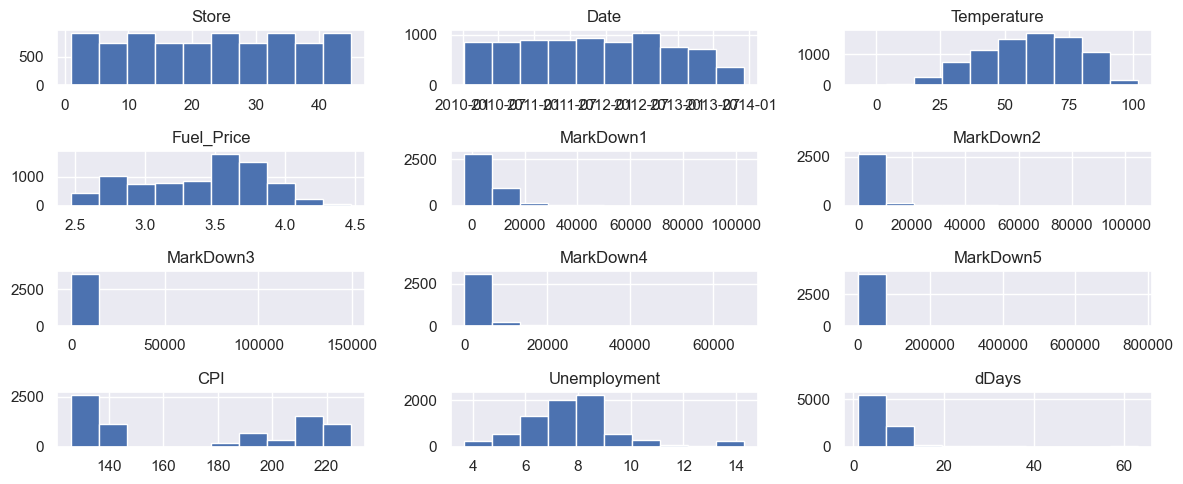

In [147]:
featDF.hist(figsize=(12, 5))
plt.tight_layout()
plt.show()

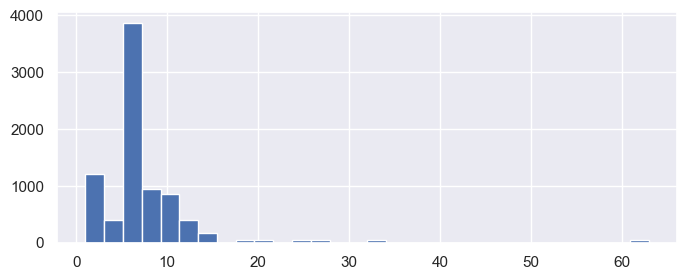

In [148]:
featDF.dDays.hist(bins=30)
plt.show()